## Data Collection using Kaggle API

In [161]:
!ls -lha kaggle.json

-rw-r--r--@ 1 manasak  staff    71B Jan 31 20:19 kaggle.json


The ls -lha kaggle.json command is a Linux command that lists the information about the file named "kaggle.json" in the long format, including hidden files, and in human-readable format for file sizes.

ls: is a command used to list the contents of a directory.
-l: option is used to display the contents of a directory in the long format, which includes information such as permissions, ownership, creation date, size, and file name.
-h: option is used to display file sizes in human-readable format (e.g., 1K, 234M, 2G, etc.)
-a: option is used to display hidden files, which are files that start with a dot (.).
kaggle.json: is the name of the file that the information is being displayed for.

In [162]:
!pip install -q kaggle

The pip install -q kaggle command is used to install the kaggle package using the Python package manager (pip). The -q option stands for "quiet" and suppresses any output that would normally be displayed during the installation process.

In this case, the kaggle package is a Python client for the Kaggle API that allows users to interact with Kaggle datasets and competitions, download files and submit entries directly from the command line.

In [163]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

The mkdir -p ~/.kaggle command creates a directory named .kaggle in the home directory (represented by ~/) of the current user.

mkdir is a command used to create a directory.
-p is an option that tells the mkdir command to create any parent directories that do not exist. For example, if the parent directory of .kaggle (~/) does not exist, it will be created.
~/ is a shorthand for the home directory of the current user.
.kaggle is the name of the directory being created. The . in front of the directory name indicates that it is a hidden directory in Linux.

The cp kaggle.json ~/.kaggle/ command is used to copy a file named "kaggle.json" to the .kaggle directory in the home directory (represented by ~/) of the current user.

cp is a command used to copy files or directories.
kaggle.json is the name of the file being copied.
~/.kaggle/ is the destination directory for the file, where it will be copied to. The ~/ represents the home directory of the current user and .kaggle is the name of the directory.

In [164]:
!chmod 600 /Users/manasak/.kaggle/kaggle.json

The chmod 600 ~/.kaggle/kaggle.json command is used to change the permissions of the file named kaggle.json located in the .kaggle directory in the home directory (represented by ~/) of the current user.

chmod is a command used to change the permissions of files and directories.
600 is the permissions setting for the file. In this case, 600 is an octal representation of the permissions, where each digit represents the permissions for the user (the owner), the group, and others, respectively. In this case, 600 means that the owner has read and write permissions (6 in binary is 110 which is rw- in the standard Unix permissions notation), while the group and others have no permissions (0 in binary is 000 which is --- in the standard Unix permissions notation).
~/.kaggle/kaggle.json is the file for which the permissions are being changed. The ~/ represents the home directory of the current user and .kaggle is the name of the directory containing the file, kaggle.json.

In [165]:
!pwd

/Users/manasak/Downloads/MS-Data Science/Semester 2/Machine Learning/MLProject


The pwd command stands for "print working directory" and it displays the path of the current working directory. When executed, it prints the absolute path of the current directory in which the user is located.

In [166]:
!kaggle competitions list

ref                                                                                 deadline             category            reward  teamCount  userHasEntered  
----------------------------------------------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
https://www.kaggle.com/competitions/nfl-player-contact-detection                    2023-03-01 23:59:00  Featured          $100,000        930           False  
https://www.kaggle.com/competitions/asl-signs                                       2023-05-01 23:59:00  Research          $100,000         86           False  
https://www.kaggle.com/competitions/godaddy-microbusiness-density-forecasting       2023-03-14 23:59:00  Featured           $60,000       3075           False  
https://www.kaggle.com/competitions/amp-parkinsons-disease-progression-prediction   2023-05-18 23:59:00  Featured           $60,000        217           False  
https://www.kaggle.com/competition

The kaggle competitions list command is used to list the available Kaggle competitions. It requires the Kaggle API to be installed and configured, as well as a valid Kaggle account. The output will be a table displaying information about each competition, such as its name, deadline, number of teams, and the prize pool.

Note that this command only works in a shell environment where the Kaggle API has been installed and the user has authorized their account by uploading the kaggle.json file.

In [167]:
!kaggle competitions download -c msk-redefining-cancer-treatment

msk-redefining-cancer-treatment.zip: Skipping, found more recently modified local copy (use --force to force download)


The kaggle competitions download -c msk-redefining-cancer-treatment command is used to download the data for the Kaggle competition named "msk-redefining-cancer-treatment". It requires the Kaggle API to be installed and configured, as well as a valid Kaggle account.

kaggle competitions download is the command for downloading data for a Kaggle competition.
-c msk-redefining-cancer-treatment is the option and argument to specify the competition name. In this case, the competition name is msk-redefining-cancer-treatment.
Note that this command only works in a shell environment where the Kaggle API has been installed and the user has authorized their account by uploading the kaggle.json file.

In [168]:
import requests  ## for getting data from a server GET
import re   ## for regular expressions
import pandas as pd    ## for dataframes and related
from pandas import DataFrame

In [169]:
filename="RedefiningCancerTreatment.csv"
MyFILE=open(filename,"w")  # "a"  for append   "r" for read
## with open
### Place the column names in - write to the first row
WriteThis="Date,Source,Author,Title,Headline\n"
MyFILE.write(WriteThis)
MyFILE.close()

In [170]:
endPoint = "https://newsapi.org/v2/everything?q=cancer+treatment&from=2023-01-29&to=2023-01-29&sortBy=popularity&apiKey=01de1e77a04f455f9cc9f4be51a24f0f"

In [171]:
response=requests.get(endPoint)
print(response)  

<Response [200]>


In [172]:
jsontxt = response.json()
print(jsontxt) 

{'status': 'ok', 'totalResults': 56, 'articles': [{'source': {'id': None, 'name': 'The Guardian'}, 'author': 'PA Media', 'title': 'Dame Esther Rantzen reveals she has been diagnosed with lung cancer', 'description': 'The 82-year-old broadcaster, That’s Life! presenter and founder of ChildLine says she remains ‘optimistic’Dame Esther Rantzen has said she is remaining “optimistic” after revealing she has been diagnosed with lung cancer.The 82-year-old broadcaster, longtime …', 'url': 'https://www.theguardian.com/tv-and-radio/2023/jan/29/dame-esther-rantzen-reveals-she-has-been-diagnosed-with-lung-cancer', 'urlToImage': 'https://i.guim.co.uk/img/media/0ac75005bcb09a8c717add4b0270f936ccfb6e5f/0_289_2221_1332/master/2221.jpg?width=1200&height=630&quality=85&auto=format&fit=crop&overlay-align=bottom%2Cleft&overlay-width=100p&overlay-base64=L2ltZy9zdGF0aWMvb3ZlcmxheXMvdGctZGVmYXVsdC5wbmc&enable=upscale&s=53b315e981987b802edfa018c1bb4f68', 'publishedAt': '2023-01-29T12:50:40Z', 'content': 'Dam

In [173]:
for items in jsontxt["articles"]:
        print(items, "\n\n\n")

{'source': {'id': None, 'name': 'The Guardian'}, 'author': 'PA Media', 'title': 'Dame Esther Rantzen reveals she has been diagnosed with lung cancer', 'description': 'The 82-year-old broadcaster, That’s Life! presenter and founder of ChildLine says she remains ‘optimistic’Dame Esther Rantzen has said she is remaining “optimistic” after revealing she has been diagnosed with lung cancer.The 82-year-old broadcaster, longtime …', 'url': 'https://www.theguardian.com/tv-and-radio/2023/jan/29/dame-esther-rantzen-reveals-she-has-been-diagnosed-with-lung-cancer', 'urlToImage': 'https://i.guim.co.uk/img/media/0ac75005bcb09a8c717add4b0270f936ccfb6e5f/0_289_2221_1332/master/2221.jpg?width=1200&height=630&quality=85&auto=format&fit=crop&overlay-align=bottom%2Cleft&overlay-width=100p&overlay-base64=L2ltZy9zdGF0aWMvb3ZlcmxheXMvdGctZGVmYXVsdC5wbmc&enable=upscale&s=53b315e981987b802edfa018c1bb4f68', 'publishedAt': '2023-01-29T12:50:40Z', 'content': 'Dame Esther Rantzen has said she is remaining optimis

In [174]:
    MyFILE=open(filename, "a")
    #LABEL=topic
    for items in jsontxt["articles"]:
        
                  
        Author=items["author"]
        Author=str(Author)
        #Author=Author.replace(',', '')
        
        Source=items["source"]["name"]
        
        
        Date=items["publishedAt"]
        ##clean up the date
        NewDate=Date.split("T")
        Date=NewDate[0]
        
        
        ## CLEAN the Title
        ##----------------------------------------------------------
        ##Replace punctuation with space
        # Accept one or more copies of punctuation         
        # plus zero or more copies of a space
        # and replace it with a single space
        Title=items["title"]
        Title=str(Title)
        #print(Title)
        Title=re.sub(r'[,.;@#?!&$\-\']+', ' ', str(Title), flags=re.IGNORECASE)
        Title=re.sub(' +', ' ', str(Title), flags=re.IGNORECASE)
        Title=re.sub(r'\"', ' ', str(Title), flags=re.IGNORECASE)
        
        # and replace it with a single space
        ## NOTE: Using the "^" on the inside of the [] means
        ## we want to look for any chars NOT a-z or A-Z and replace
        ## them with blank. This removes chars that should not be there.
        Title=re.sub(r'[^a-zA-Z]', " ", str(Title), flags=re.VERBOSE)
        Title=Title.replace(',', '')
        Title=' '.join(Title.split())
        Title=re.sub("\n|\r", "", Title)
        #print(Title)
        ##----------------------------------------------------------
        
        Headline=items["description"]
        Headline=str(Headline)
        Headline=re.sub(r'[,.;@#?!&$\-\']+', ' ', Headline, flags=re.IGNORECASE)
        Headline=re.sub(' +', ' ', Headline, flags=re.IGNORECASE)
        Headline=re.sub(r'\"', ' ', Headline, flags=re.IGNORECASE)
        Headline=re.sub(r'[^a-zA-Z]', " ", Headline, flags=re.VERBOSE)
        ## Be sure there are no commas in the headlines or it will
        ## write poorly to a csv file....
        Headline=Headline.replace(',', '')
        Headline=' '.join(Headline.split())
        Headline=re.sub("\n|\r", "", Headline)
        
        ### AS AN OPTION - remove words of a given length............
        Headline = ' '.join([wd for wd in Headline.split() if len(wd)>3])
    
        #print("Author: ", Author, "\n")
        #print("Title: ", Title, "\n")
        #print("Headline News Item: ", Headline, "\n\n")
        
        #print(Author)
        #print(Title)
        #print(Headline)
        
        WriteThis=str(Date)+","+str(Source)+","+str(Author)+","+ str(Title) + "," + str(Headline) + "\n"
        #print(WriteThis)
        
        MyFILE.write(WriteThis)
        
    MyFILE.close()

In [175]:
import pandas as pd
import zipfile

zf = zipfile.ZipFile('msk-redefining-cancer-treatment.zip')

zf.extractall()

training_variants = pd.read_csv('training_variants.zip')
print('Number of data points:', training_variants.shape[0])
print('Number of features:', training_variants.shape[1])
print('Features:', training_variants.columns.values)
training_variants.head()

Number of data points: 3321
Number of features: 4
Features: ['ID' 'Gene' 'Variation' 'Class']


,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


In [176]:
training_text =pd.read_csv("training_text.zip",sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)
print('Number of data points : ', training_text.shape[0])
print('Number of features : ', training_text.shape[1])
print('Features : ', training_text.columns.values)
training_text.head()

Number of data points :  3321
Number of features :  2
Features :  ['ID' 'TEXT']


,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


In [59]:
#Merging both Data Frames
trainData = training_variants.merge(training_text,how= 'inner')

In [217]:
trainData.head()

,ID,Gene,Variation,TEXT,Class
0,0,FAM58A,Truncating Mutations,cyclin dependent kinases cdks regulate a varie...,1
1,1,CBL,W802*,abstract background non small cell lung cancer...,2
2,2,CBL,Q249E,abstract background non small cell lung cancer...,2
3,3,CBL,N454D,recent evidence has demonstrated that acquired...,3
4,4,CBL,L399V,oncogenic mutations in the monomeric casitas b...,4


In [218]:
# Re-ordering columns
trainData = trainData.reindex(columns=['ID','Gene','Variation','TEXT','Class'])

In [219]:
trainData.head()

,ID,Gene,Variation,TEXT,Class
0,0,FAM58A,Truncating Mutations,cyclin dependent kinases cdks regulate a varie...,1
1,1,CBL,W802*,abstract background non small cell lung cancer...,2
2,2,CBL,Q249E,abstract background non small cell lung cancer...,2
3,3,CBL,N454D,recent evidence has demonstrated that acquired...,3
4,4,CBL,L399V,oncogenic mutations in the monomeric casitas b...,4


Data before preprocessing

In [220]:
#Preprocessing
#Check for null values
trainData.isnull().sum()

ID           0
Gene         0
Variation    0
TEXT         0
Class        0
dtype: int64

Null Values in various fields

In [221]:
trainData.shape

(3316, 5)

In [222]:
#Removing null values
trainData = trainData[~trainData.TEXT.isnull()]

In [223]:
trainData.shape

(3316, 5)

In [224]:
#Check for null values after removing them
trainData.isnull().sum()

ID           0
Gene         0
Variation    0
TEXT         0
Class        0
dtype: int64

Null values cleaned

In [225]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3316 entries, 0 to 3320
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         3316 non-null   int64 
 1   Gene       3316 non-null   object
 2   Variation  3316 non-null   object
 3   TEXT       3316 non-null   object
 4   Class      3316 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 155.4+ KB


In [226]:
#check the distribution of each class
df = trainData.groupby('Class').Gene.describe()
df = df.reset_index()
df

,Class,count,unique,top,freq
0,1,566,141,TP53,83
1,2,452,96,EGFR,45
2,3,89,26,BRCA1,15
3,4,686,92,PTEN,115
4,5,242,48,BRCA1,90
5,6,273,54,BRCA2,84
6,7,952,108,EGFR,84
7,8,19,12,BCOR,4
8,9,37,10,SF3B1,15


In [227]:
# Install WordCloud for plotting the most common words in each class
!pip install wordcloud

In [228]:
#Function to remove any special character, any extra spaces in the Text column
def text_preprocessing(total_text):
    if type(total_text) is not int:
        string = ""
        # replace every special char with space
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', str(total_text))
        # replace multiple spaces with single space
        total_text = re.sub('\s+', ' ', total_text)
        # converting all the chars into lower-case.
        total_text = total_text.lower()

        for word in total_text.split():
            string += word + " "

        return string

In [229]:
#text processing stage.
trainData.TEXT = trainData.TEXT.apply(text_preprocessing)

In [230]:
trainData.TEXT.head()

0    cyclin dependent kinases cdks regulate a varie...
1    abstract background non small cell lung cancer...
2    abstract background non small cell lung cancer...
3    recent evidence has demonstrated that acquired...
4    oncogenic mutations in the monomeric casitas b...
Name: TEXT, dtype: object

Converted all Text to lower case

In [231]:
from sklearn.feature_extraction.text import CountVectorizer
# Get top n words in the Text
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    string = ''
    words = [string + x[0] for x in words_freq[:n]]
    return ' '.join(words)

In [232]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
# Plot Word Cloud for the top N words in the class
def plot_wordCloud(df,Class):
    df = df[df.Class == Class]
    text = df.TEXT
    common2500Words = get_top_n_words(text,2500)
    wordcloud = WordCloud(background_color="white").generate(common2500Words)
    plt.figure(figsize= (15,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

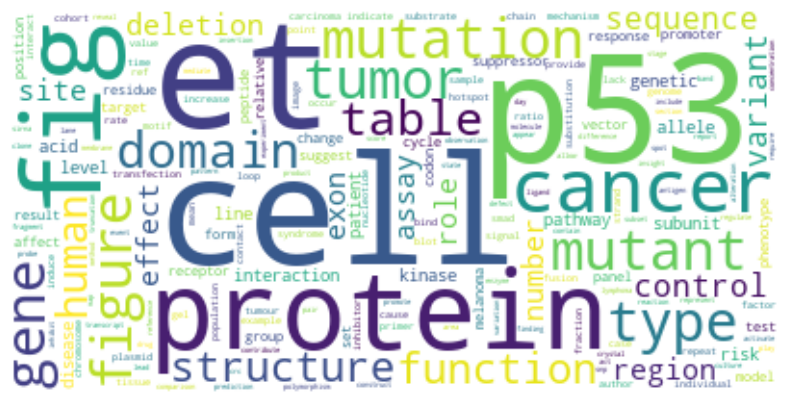

In [233]:
plot_wordCloud(df = trainData,Class = 1)

Word Cloud Visualization of Class 1

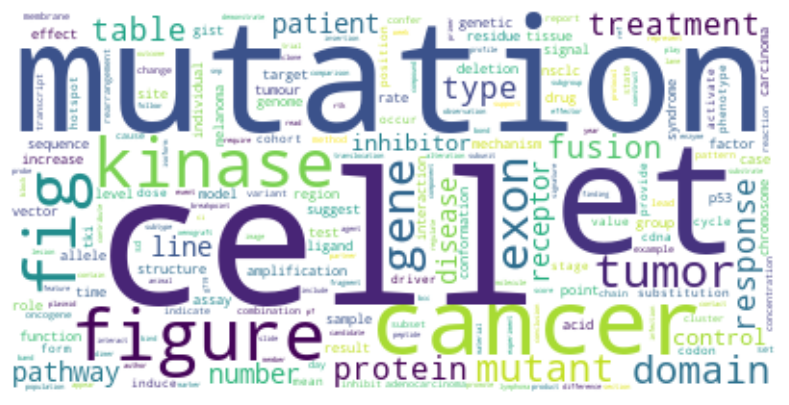

In [81]:
plot_wordCloud(df = trainData,Class = 2)

Word Cloud Visualization of Class 2

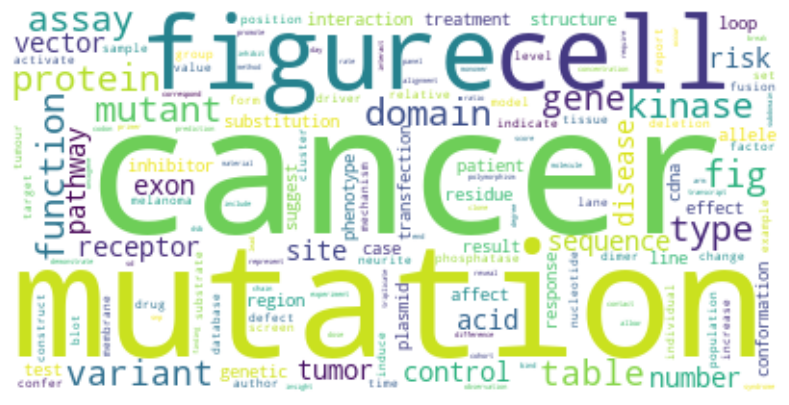

In [82]:
plot_wordCloud(df = trainData,Class = 3)

Word Cloud Visualization of Class 3

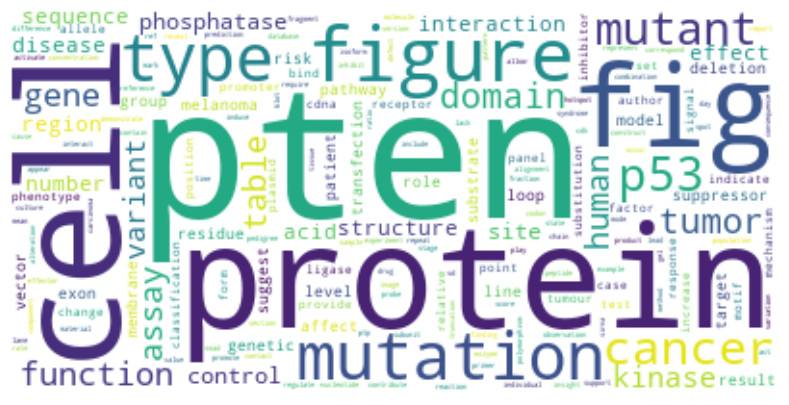

In [83]:
plot_wordCloud(df = trainData,Class = 4)

Word Cloud Visualization of Class 4

Text(0.5, 1.0, 'Count of Gene in Each Class')

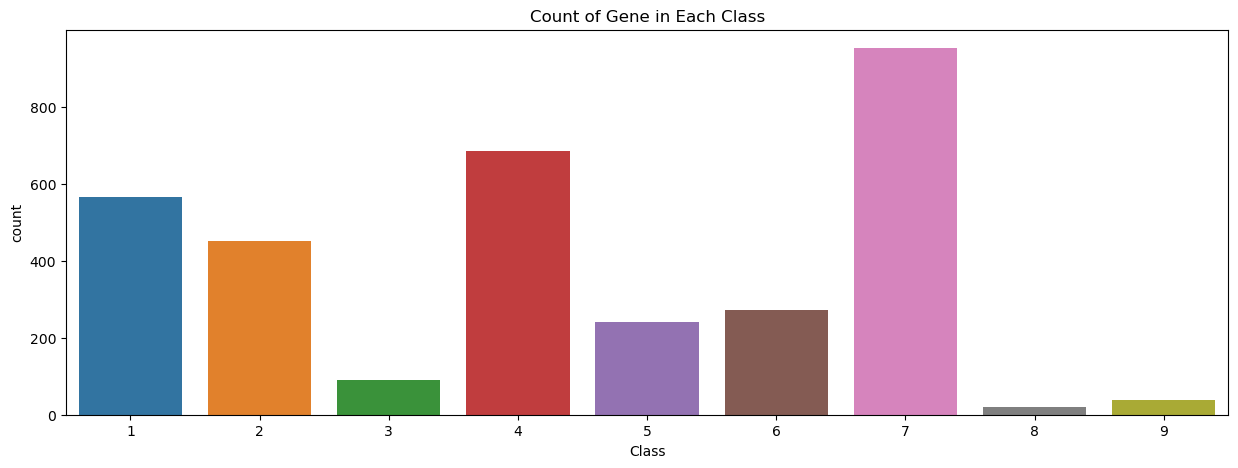

In [84]:
#visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,5))
sns.barplot(x = 'Class',y = 'count',data= df)
plt.title('Count of Gene in Each Class')

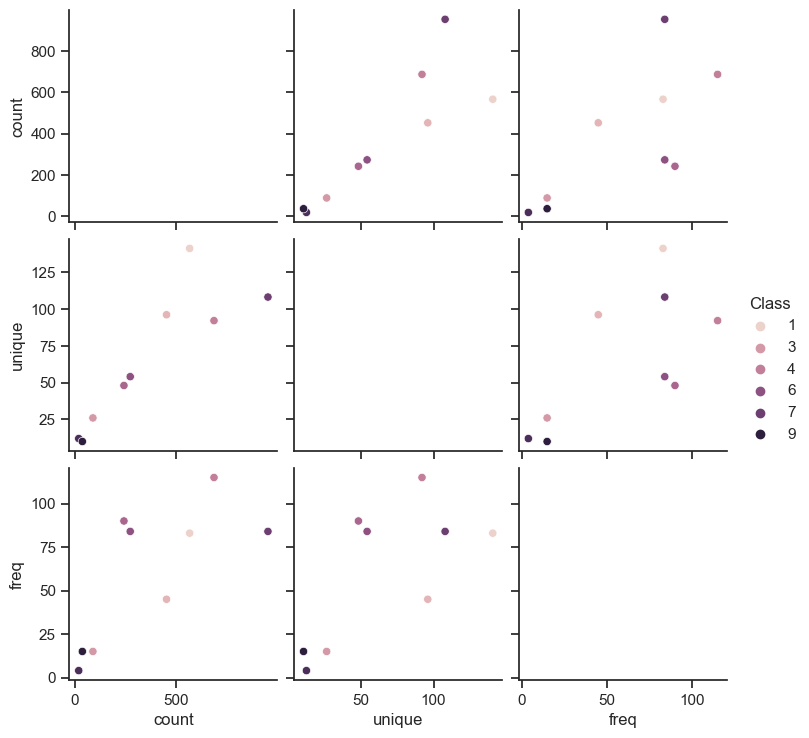

In [85]:
#sns.scatterplot(x = 'Class', y='count', data=df)

sns.set_theme(style="ticks")

sns.pairplot(df, hue="Class")


Pair plots of various variables

Text(0.5, 1.0, 'Histogram of Gene variable')

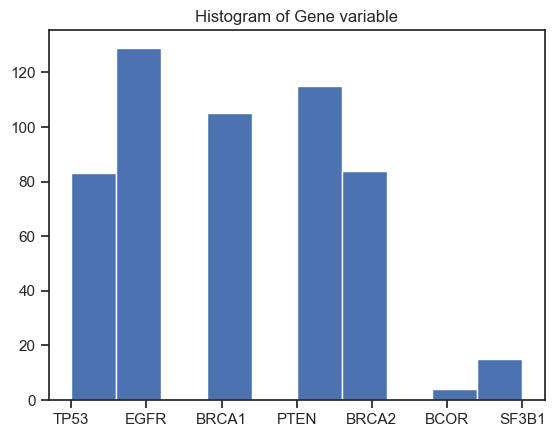

In [86]:
plt.hist(df["top"], weights= df["freq"])
#plt.hist(trainData["Gene"])
#plt.xticks(rotation=90)
plt.title("Histogram of Gene variable")

Text(0.5, 1.0, 'Pie Chart of Class variable')

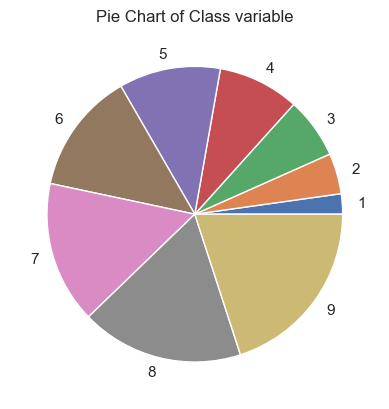

In [87]:
plt.pie(df["Class"], labels= df["Class"])
plt.title("Pie Chart of Class variable")

Text(0.5, 1.0, 'Count Plot for Class')

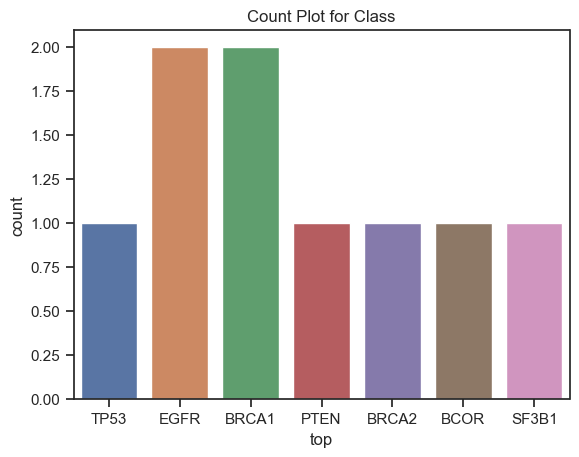

In [88]:
sns.countplot(x='top',data=df)
plt.title("Count Plot for Class")

Text(0.5, 1.0, 'Box plot showing distribution for Class')

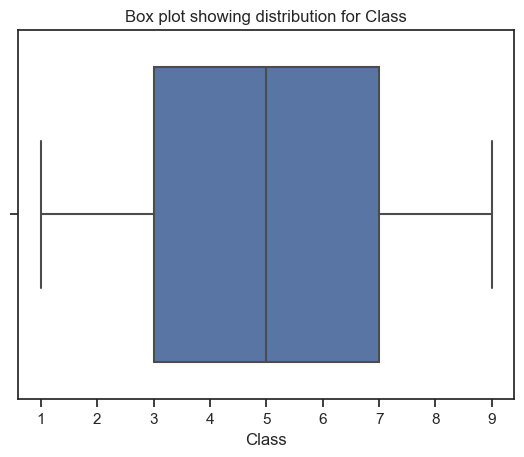

In [89]:
sns.boxplot(x="Class", data=df)
plt.title("Box plot showing distribution for Class")

Text(0.5, 1.0, 'Box plot showing distribution for Class and count')

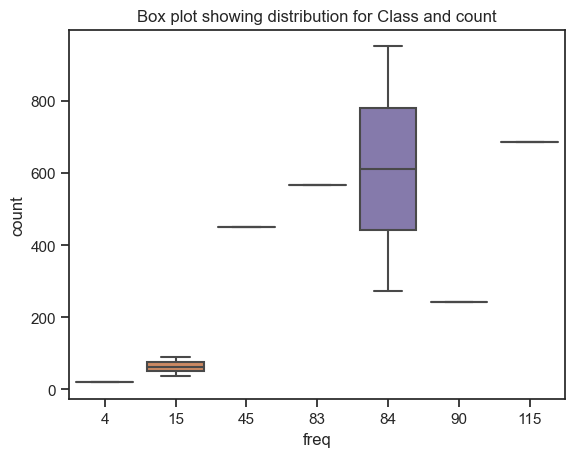

In [90]:
sns.boxplot(x="freq", y="count", data=df)
plt.title("Box plot showing distribution for Class and count")

Text(0.5, 1.0, 'Joint plot of CLass and Count')

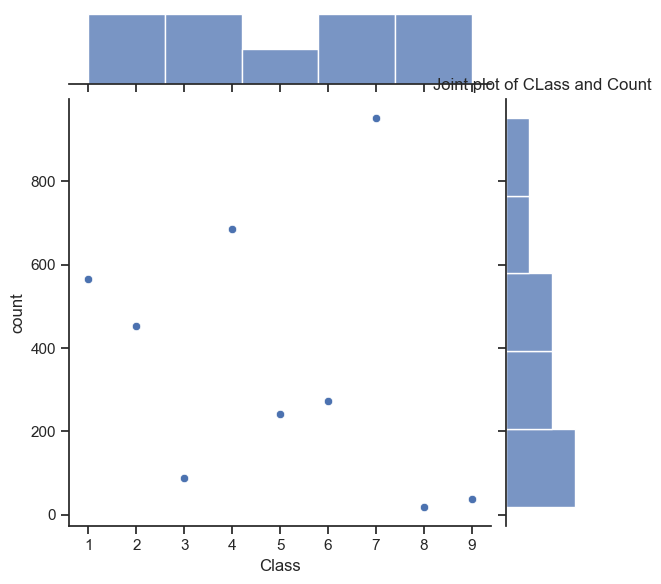

In [91]:
sns.jointplot(x='Class', y='count', data=df, kind='scatter')
plt.title("Joint plot of CLass and Count")

/Users/manasak/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution plot of Frequency variable')

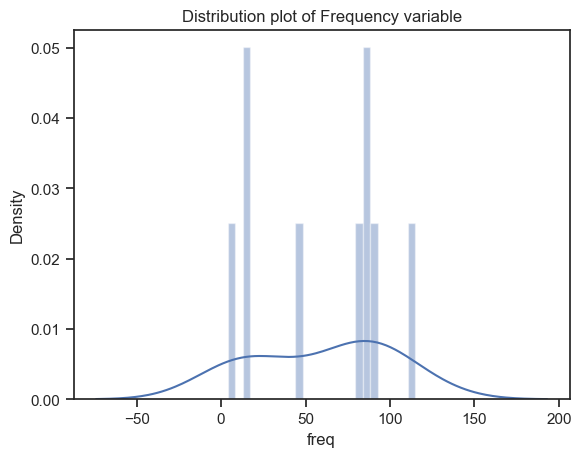

In [92]:
sns.distplot(df['freq'],bins=25, kde=True)
plt.title("Distribution plot of Frequency variable")

Text(0.5, 1.0, 'Scatter plot Grid')

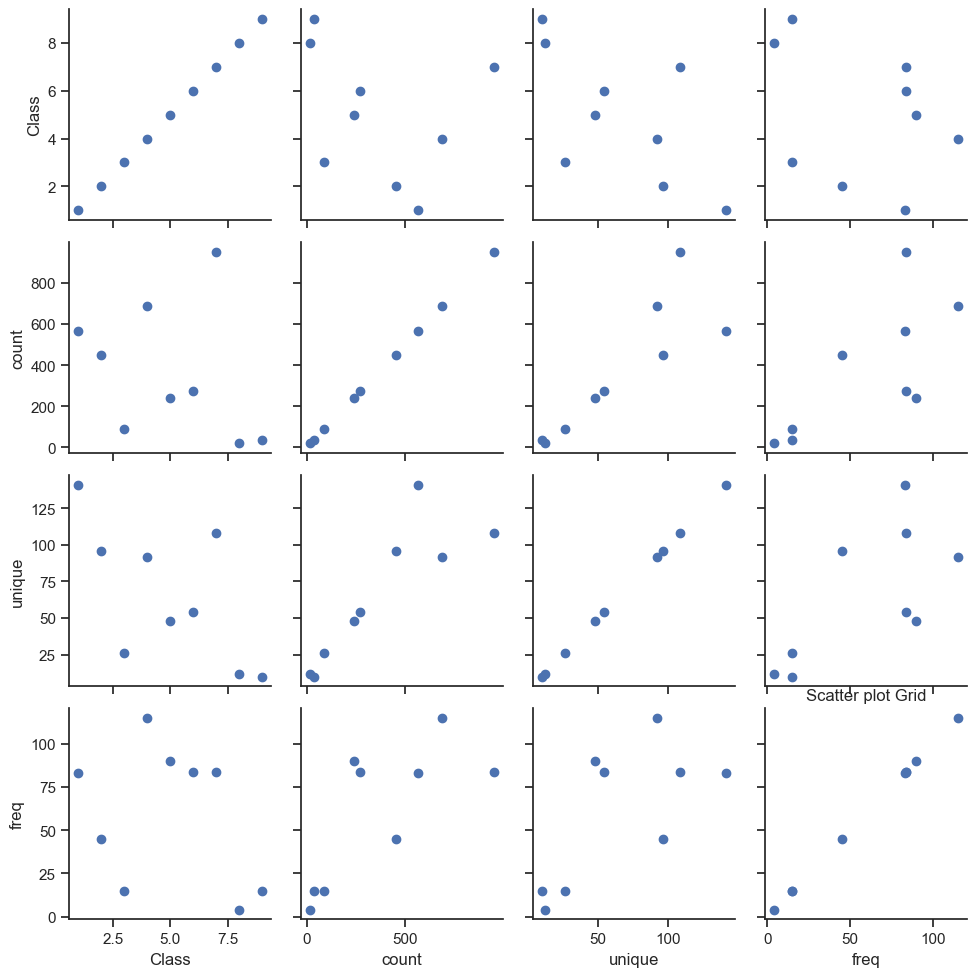

In [93]:
grids=sns.PairGrid(df)
grids.map(plt.scatter)
plt.title("Scatter plot Grid")

Unsupervised Learning- Clustering:

In [180]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/manasak/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [191]:
import nltk
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

In [201]:
from subprocess import check_output
train = pd.read_csv('training_text', sep="\|\|", engine='python', header=None, skiprows=1, names=["ID","Text"])
train.head()

,ID,Text
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


In [203]:
len(train['Text'][0].split())
train = train[train['Text'].notnull()]

In [204]:
train['len_text'] = train['Text'].apply(lambda x: len(x.split()))

In [205]:
train['Text'] = train['Text'].apply(lambda x : " ".join([word for word in x.lower().split() if word not in stopwords]))

In [258]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()
X = vect.fit_transform(train['Text'])
#X = vect.fit_transform(train['Text'][1:100])

TfidfVectorizer()


In [ ]:
silhouette_coefficients = []
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_coefficients.append(score)
    
    
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.title("Silhouette Interpretation")
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.03306250131710177
For n_clusters = 3 The average silhouette_score is : 0.04935450189075764
For n_clusters = 4 The average silhouette_score is : 0.05647245393680728
For n_clusters = 5 The average silhouette_score is : 0.06168067398265208
For n_clusters = 6 The average silhouette_score is : 0.06724092477873568
For n_clusters = 7 The average silhouette_score is : 0.07324364026014987
For n_clusters = 8 The average silhouette_score is : 0.06931317298622876
For n_clusters = 9 The average silhouette_score is : 0.07876090022181341
For n_clusters = 10 The average silhouette_score is : 0.08415591754639927


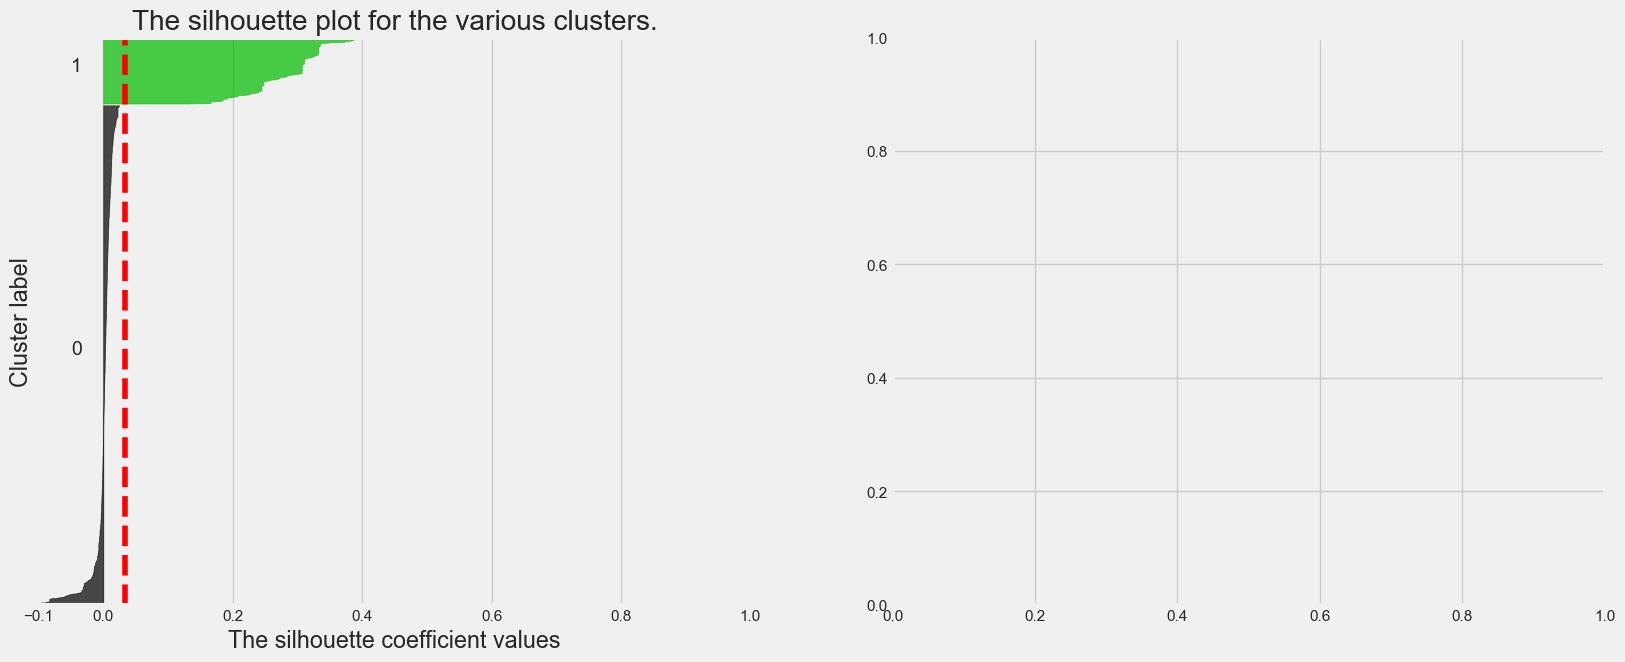

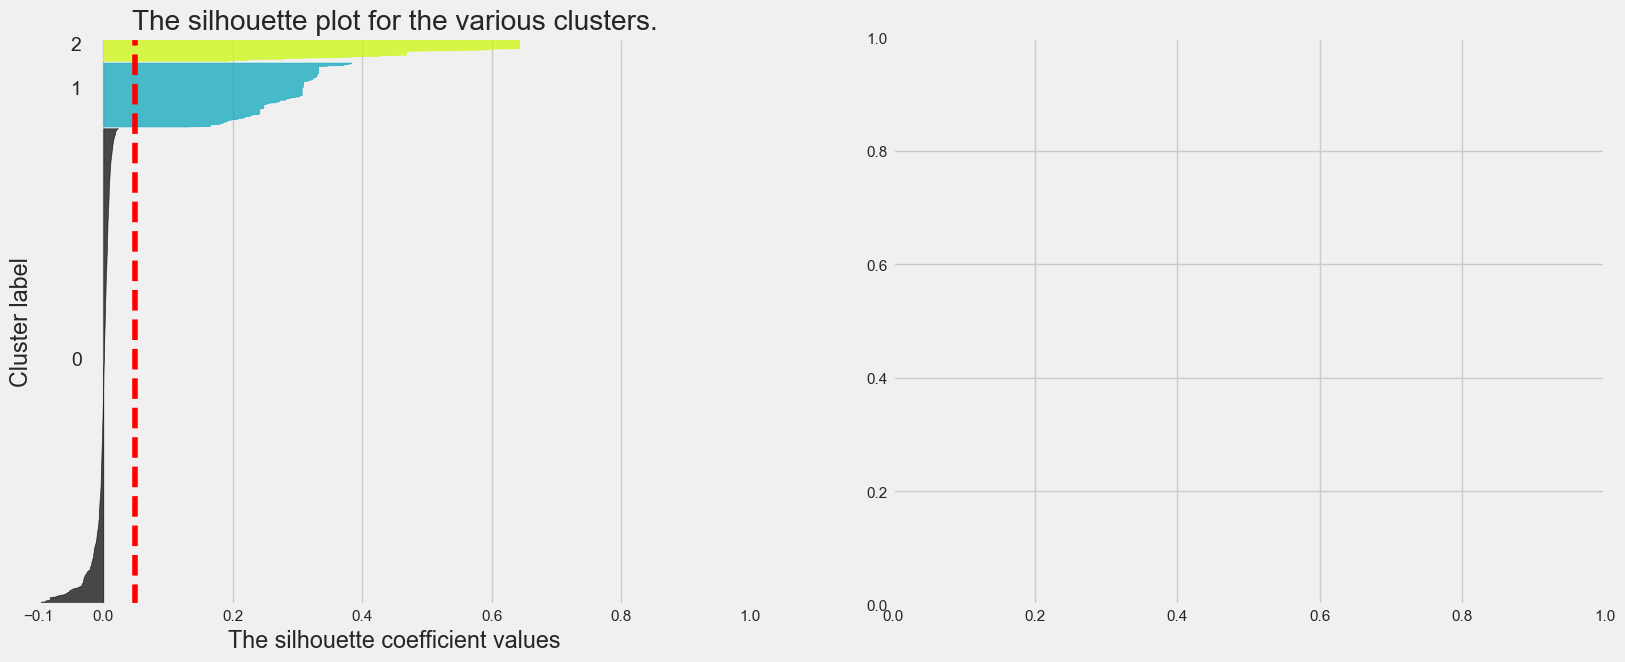

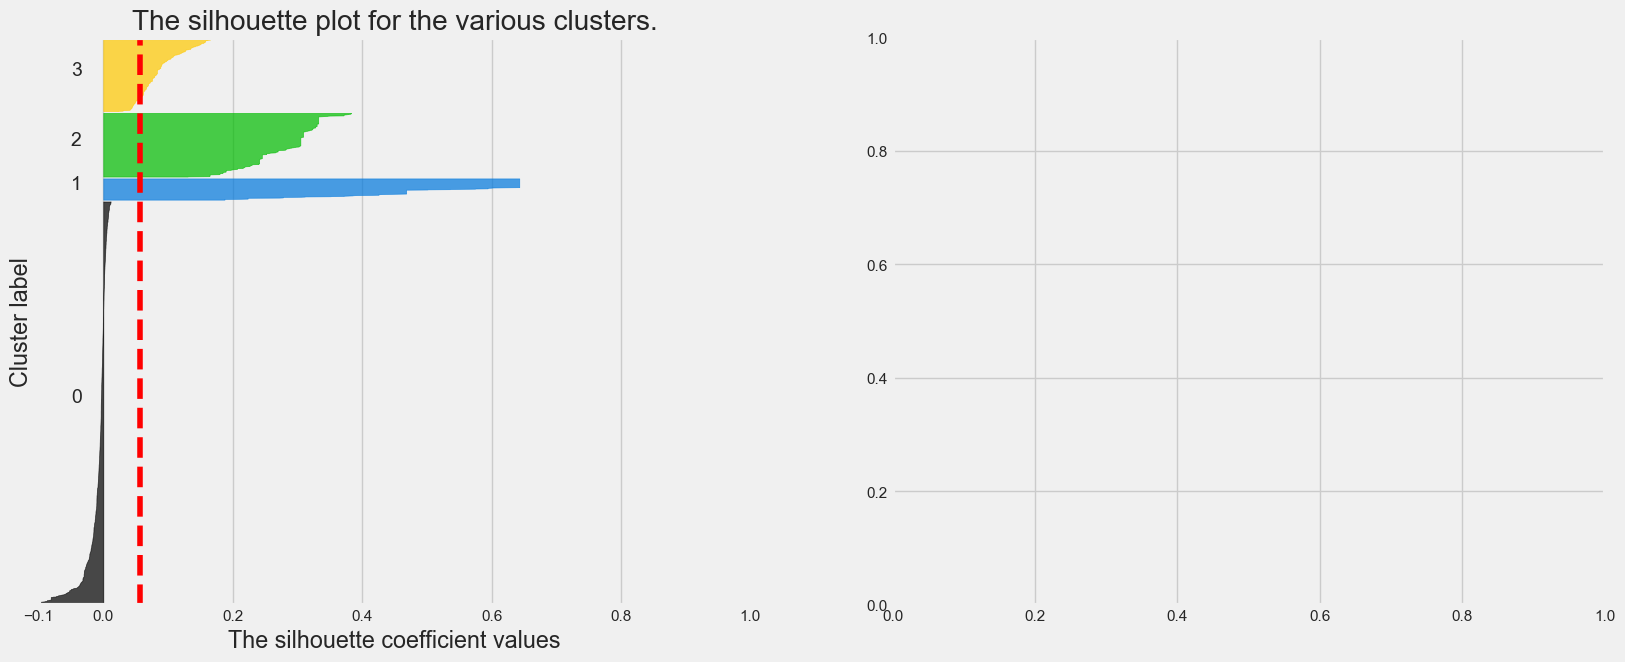

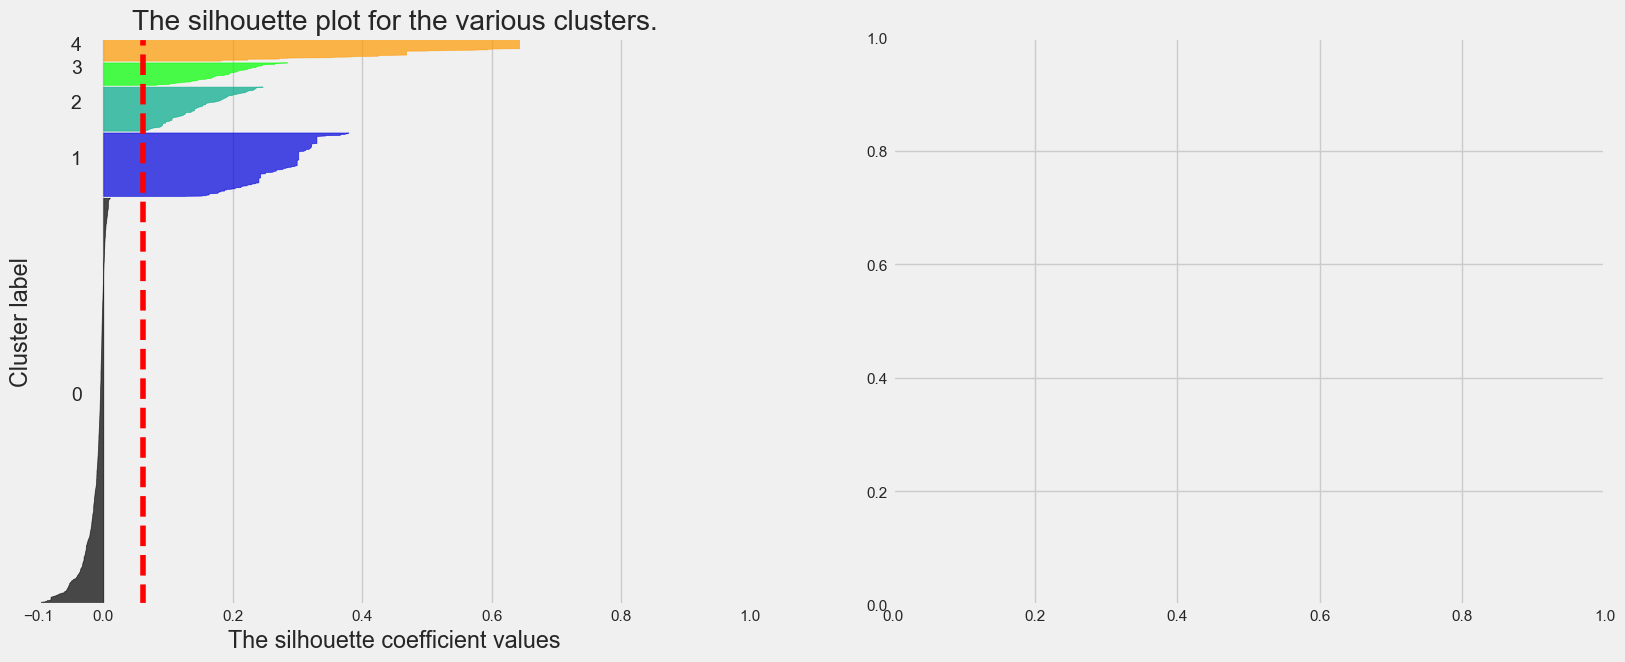

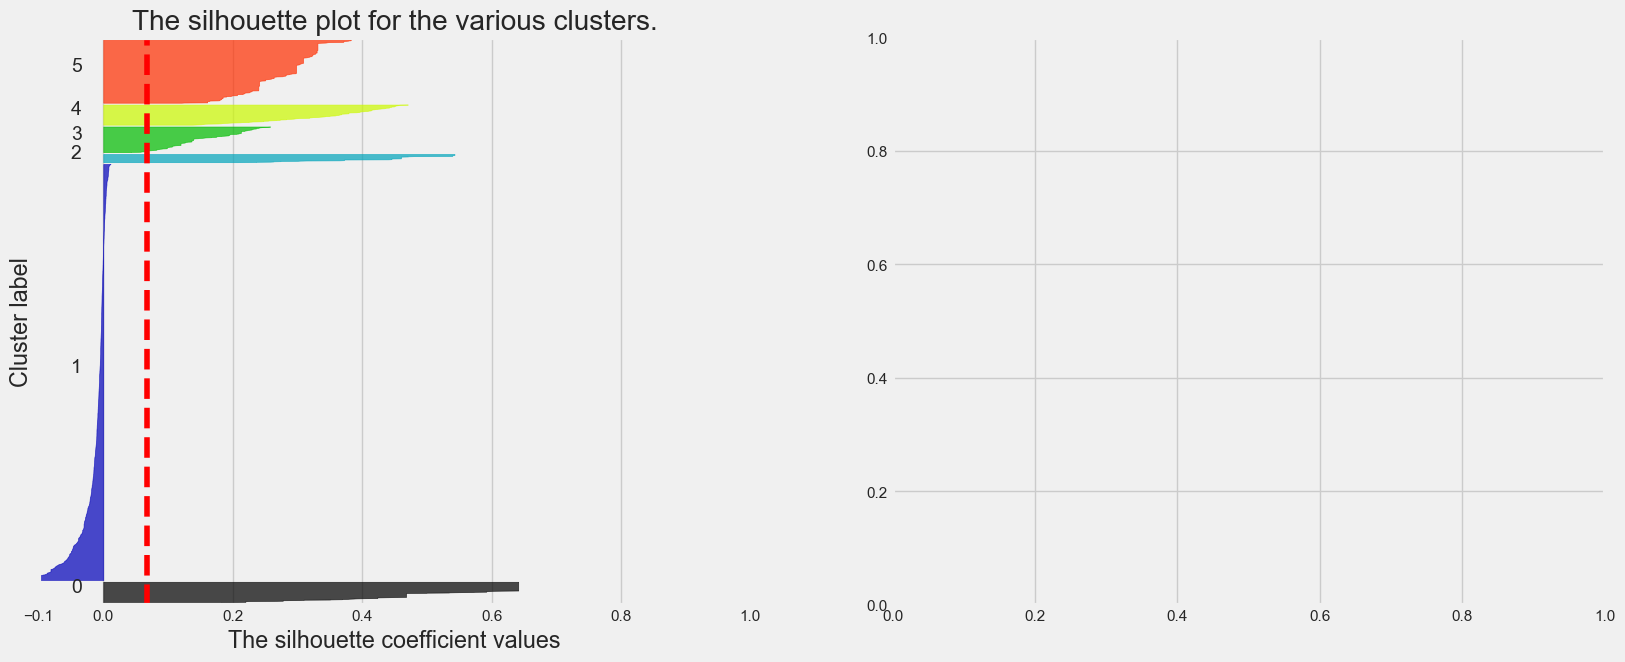

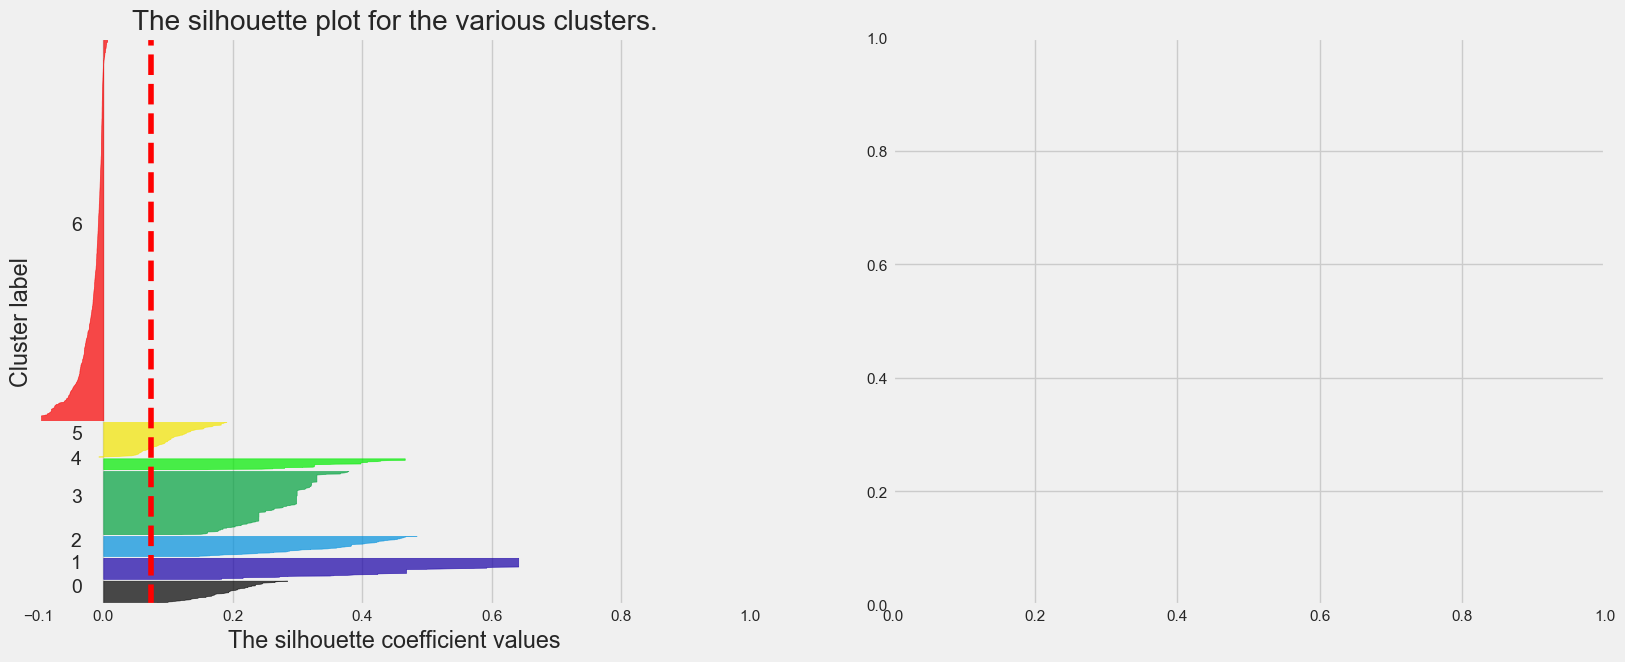

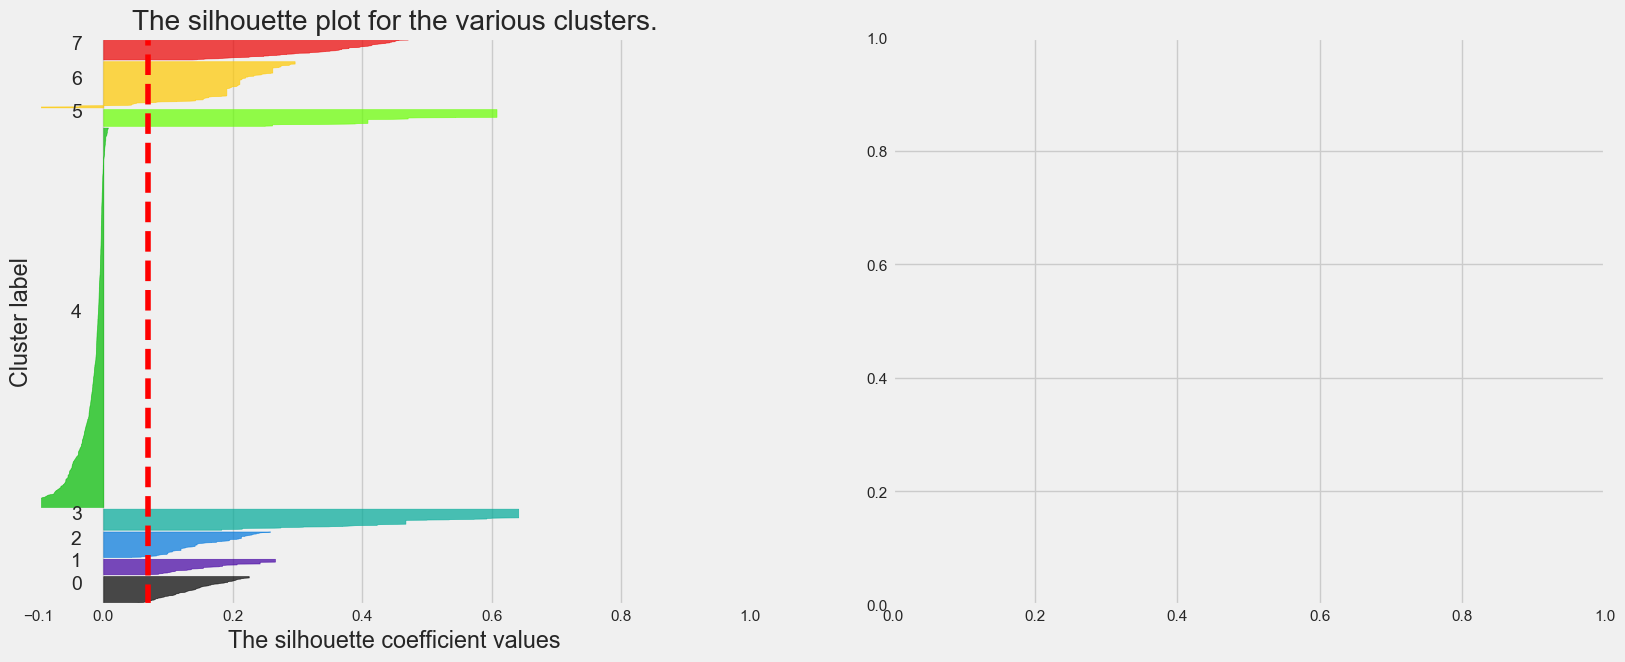

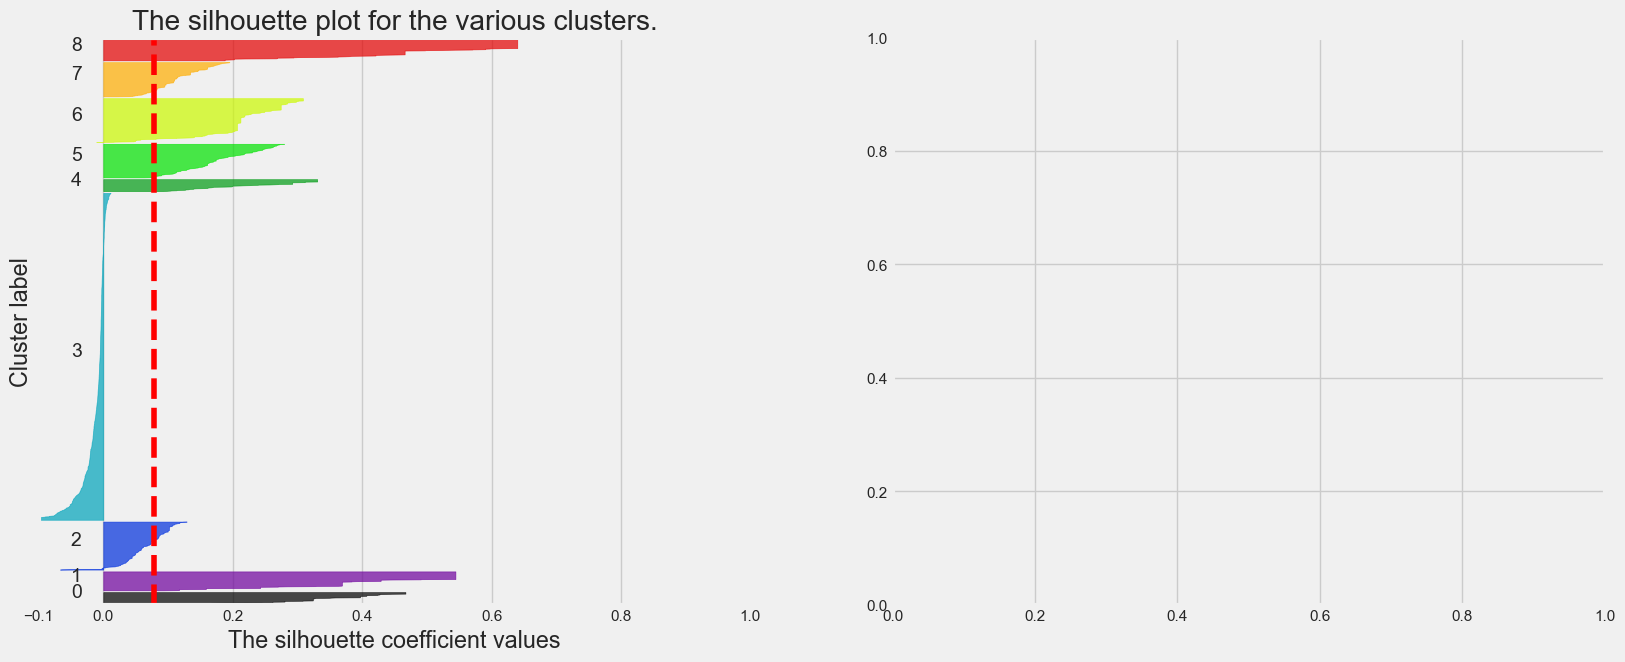

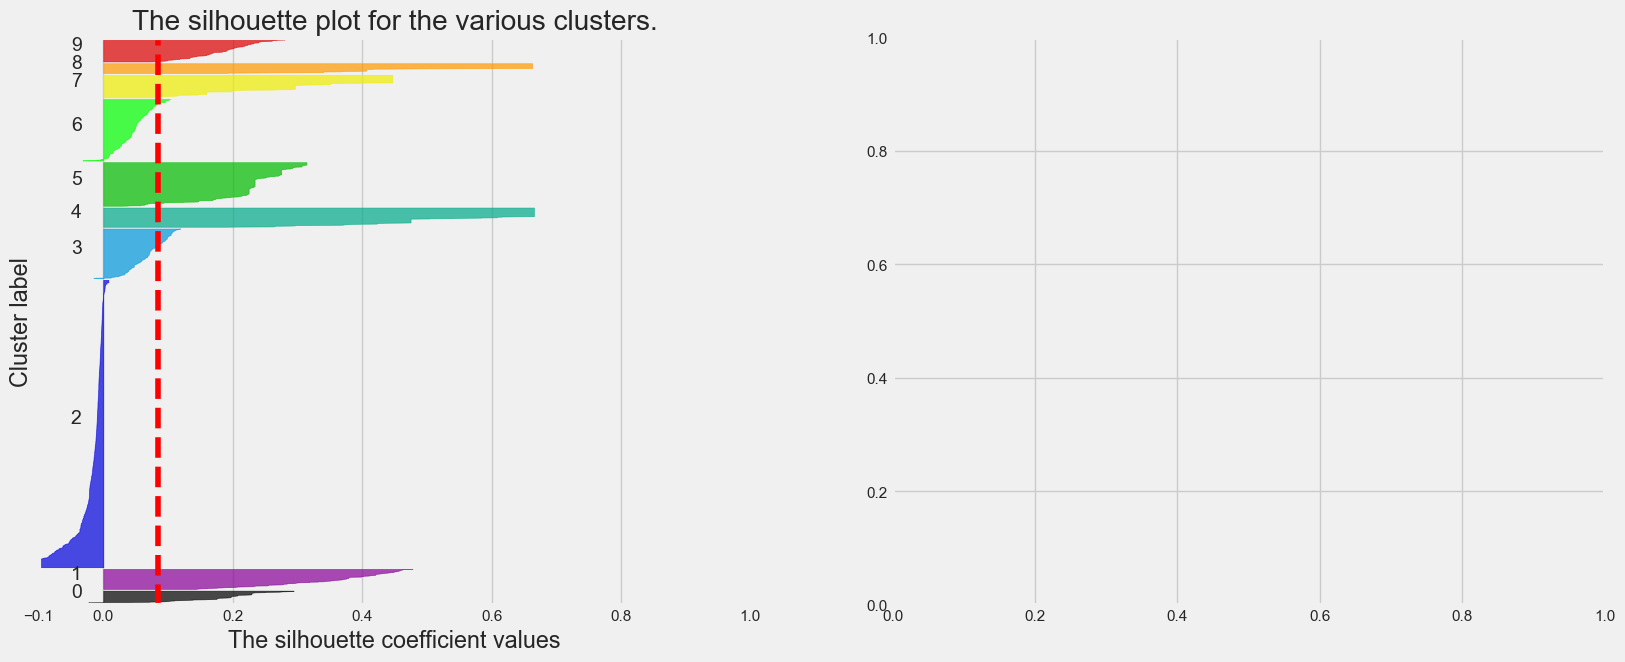

In [294]:
import matplotlib.cm as cm
import numpy as np
range_n_clusters = [i for i in range(2,11)]

                          
silhouette_score_ = []
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(train) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])



plt.show()

In [250]:
# Using 9 clusters from above inference
from sklearn.cluster import KMeans
km = KMeans(n_clusters=9)
km.fit(X)
My_labels=km.predict(X)
print(My_labels)

[4 4 4 ... 4 4 4]


In [244]:
# https://stackoverflow.com/questions/27889873/clustering-text-documents-using-scikit-learn-kmeans-in-python
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vect.get_feature_names()
for i in range(9):
    print ("Cluster %d:" % i)
    for ind in order_centroids[i, :20]:
        print(' %s' % terms[ind])
    print()

Top terms per cluster:
Cluster 0:
 fgfr2
 fgfr3
 fgfr
 mutations
 fgfr1
 kinase
 jnj42756493
 figure
 kd
 cells
 cell
 fgf
 dovitinib
 mutation
 cancer
 fusion
 receptor
 azd4547
 fgfrs
 k650e

Cluster 1:
 egfr
 imatinib
 mutations
 gefitinib
 patients
 kit
 pdgfra
 exon
 mutation
 gist
 gists
 l858r
 erlotinib
 response
 kinase
 tkis
 nsclc
 tki
 treatment
 resistance

Cluster 2:
 p53
 p53s
 mutant
 mutants
 dna
 mutations
 cells
 binding
 transactivation
 apoptosis
 type
 tp53
 dsred
 wild
 h115n
 fig
 tetramer
 protein
 activity
 core

Cluster 3:
 brca1
 brct
 variants
 mutations
 manuscript
 cancer
 transcriptional
 author
 e2
 fig
 protein
 missense
 functional
 phosphopeptide
 binding
 assays
 bard1
 variant
 structure
 m1775r

Cluster 4:
 mutations
 cells
 al
 et
 cell
 fig
 figure
 mutation
 ras
 cancer
 kinase
 raf
 braf
 protein
 expression
 mutant
 patients
 gene
 tumor
 domain

Cluster 5:
 pten
 mutations
 phts
 phosphatase
 asd
 pip3
 dd
 activity
 catalytic
 ptdins
 yeast

/Users/manasak/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [251]:
#Dr G Code from website: https://gatesboltonanalytics.com/?page_id=262
from sklearn.metrics import silhouette_samples, silhouette_score

#km2 = KMeans(n_clusters=10)
#km2.fit(X)
#My_labels2=km2.predict(X)

print("Silhouette Score for k = 9 \n",silhouette_score(X, km.labels_))
#print("Silhouette Score for k = 10 \n",silhouette_score(X, My_labels2))

Silhouette Score for k = 9 
 0.07874400779990427


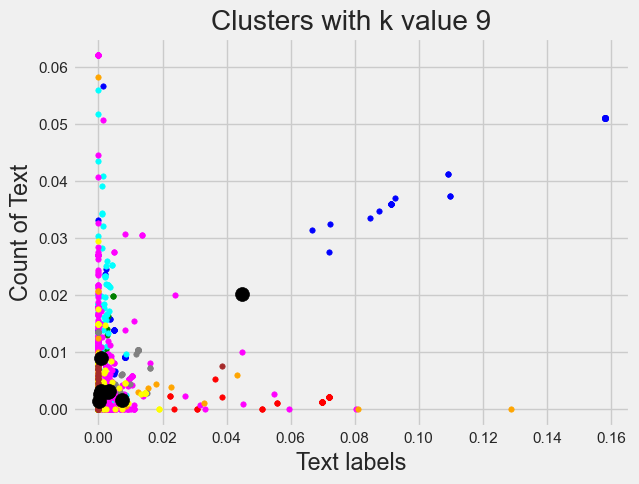

In [310]:
#plt.plot(range(1,11),my_list)
#plt.show()



#kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
#y_kmeans = kmeans.fit_predict(x)

plt.scatter(X[My_labels == 0,0].toarray(), X[My_labels==0,1].toarray(), s = 15, c= 'red', label = 'Cluster_1')
plt.scatter(X[My_labels == 1,0].toarray(), X[My_labels==1,1].toarray(), s = 15, c= 'blue', label = 'Cluster_2')
plt.scatter(X[My_labels == 2,0].toarray(), X[My_labels==2,1].toarray(), s = 15, c= 'green', label = 'Cluster_3')
plt.scatter(X[My_labels == 3,0].toarray(), X[My_labels==3,1].toarray(), s = 15, c= 'cyan', label = 'Cluster_4')
plt.scatter(X[My_labels == 4,0].toarray(), X[My_labels==4,1].toarray(), s = 15, c= 'magenta', label = 'Cluster_5')
plt.scatter(X[My_labels == 5,0].toarray(), X[My_labels==5,1].toarray(), s = 15, c= 'orange', label = 'Cluster_6')
plt.scatter(X[My_labels == 6,0].toarray(), X[My_labels==6,1].toarray(), s = 15, c= 'grey', label = 'Cluster_7')
plt.scatter(X[My_labels == 7,0].toarray(), X[My_labels==7,1].toarray(), s = 15, c= 'yellow', label = 'Cluster_8')
plt.scatter(X[My_labels == 8,0].toarray(), X[My_labels==8,1].toarray(), s = 15, c= 'brown', label = 'Cluster_9')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')
plt.title('Clusters with k value 9')
plt.xlabel('Text labels')
plt.ylabel('Count of Text')
plt.show()

In [277]:
trainData[km.labels_ == 0].groupby('Class').size()

Class
1    57
2    17
3     1
4    96
5    12
6    14
7    41
8     1
9     4
dtype: int64

In [278]:
trainData[km.labels_ == 1].groupby('Class').size()

Class
1    39
3     6
4    36
5    33
6    92
7     1
dtype: int64

In [279]:
trainData[km.labels_ == 2].groupby('Class').size()

Class
1    60
3    15
4    47
5    90
6    52
dtype: int64

In [280]:
trainData[km.labels_ == 3].groupby('Class').size()

Class
1     1
2    62
3    10
4     1
5     4
6     1
7    75
dtype: int64

In [281]:
trainData[km.labels_ == 4].groupby('Class').size()

Class
1    402
2    257
3     41
4    375
5     83
6     99
7    580
8     18
9     33
dtype: int64

In [282]:
trainData[km.labels_ == 5].groupby('Class').size()

Class
1     1
2    41
4     3
5     2
6     1
7    73
dtype: int64

In [283]:
trainData[km.labels_ == 6].groupby('Class').size()

Class
1      2
3      5
4    112
5      4
6      1
7      3
dtype: int64

In [284]:
trainData[km.labels_ == 7].groupby('Class').size()

Class
1      4
2     55
3      1
4     16
5      9
6     12
7    126
dtype: int64

In [285]:
trainData[km.labels_ == 8].groupby('Class').size()

Class
2    20
3    10
5     5
6     1
7    53
dtype: int64

In [286]:
new_column_names = ['ID', 'Gene','Variation','Class']
training_variants.to_csv('ClusterTrainData.csv', index=False, header=new_column_names)

In [287]:
training_variants_clustering = pd.read_csv('ClusterTrainData.csv')
fin_clus_dataset_text =  training_variants.iloc[: , 1:]
fin_clus_dataset_num = training_variants.iloc[: , [0,3]]

In [288]:
training_variants.head()

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


In [289]:
fin_clus_dataset_text.head()

,Gene,Variation,Class
0,FAM58A,Truncating Mutations,1
1,CBL,W802*,2
2,CBL,Q249E,2
3,CBL,N454D,3
4,CBL,L399V,4


In [290]:
fin_clus_dataset_num.head()

,ID,Class
0,0,1
1,1,2
2,2,2
3,3,3
4,4,4


In [140]:
from sklearn.cluster import KMeans

/var/folders/3z/0y2_w0b11r7d0tynjxbry4zh0000gn/T/ipykernel_57024/3658941663.py:5: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  kmeans.fit(fin_clus_dataset_num)


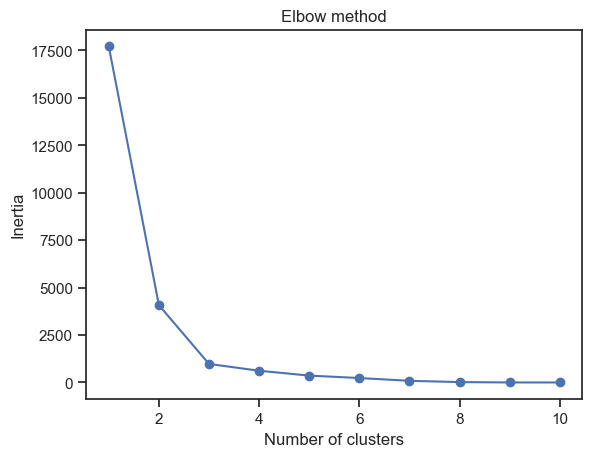

In [125]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(fin_clus_dataset_num)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

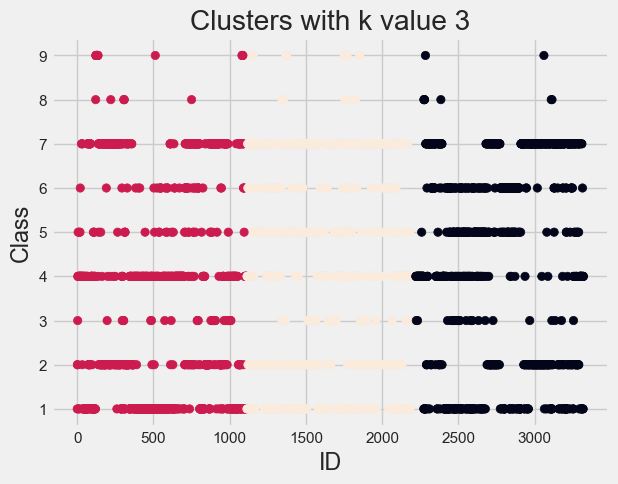

In [307]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(fin_clus_dataset_num)

x=fin_clus_dataset_num.iloc[:,0] ## ID
y=fin_clus_dataset_num.iloc[:,1] ## CLASS

plt.scatter(x, y, c=kmeans.labels_)
plt.title('Clusters with k value 3')
plt.xlabel('ID')
plt.ylabel('Class')
plt.show()

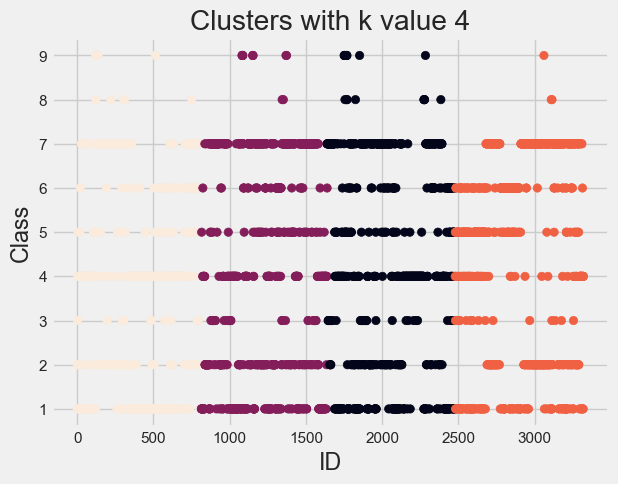

In [308]:
kmeans2 = KMeans(n_clusters=4)
kmeans2.fit(fin_clus_dataset_num)

x=fin_clus_dataset_num.iloc[:,0] ## ID
y=fin_clus_dataset_num.iloc[:,1] ## CLASS

plt.scatter(x, y, c=kmeans2.labels_)
plt.title('Clusters with k value 4')
plt.xlabel('ID')
plt.ylabel('Class')
plt.show()

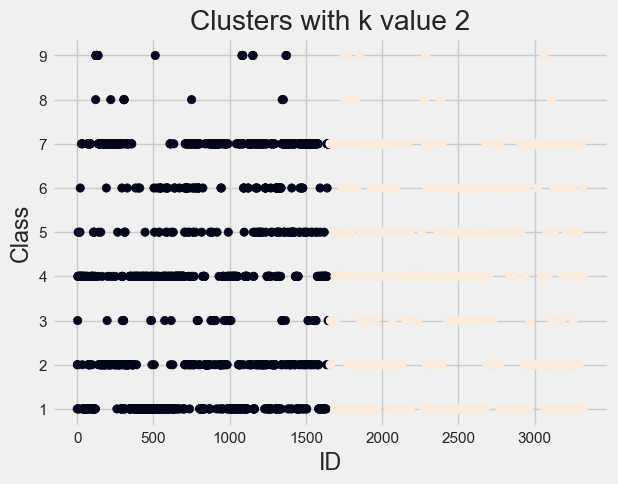

In [309]:
kmeans3 = KMeans(n_clusters=2)
kmeans3.fit(fin_clus_dataset_num)

x=fin_clus_dataset_num.iloc[:,0] ## ID
y=fin_clus_dataset_num.iloc[:,1] ## CLASS

plt.scatter(x, y, c=kmeans3.labels_)
plt.title('Clusters with k value 2')
plt.xlabel('ID')
plt.ylabel('Class')
plt.show()

In [158]:
hm_data_id = fin_clus_dataset_num.iloc[:,:1]
hm_data_id.head()

,ID
0,0
1,1
2,2
3,3
4,4


In [159]:
hm_data_class = fin_clus_dataset_num.iloc[:,1:]
hm_data_class.head()

,Class
0,1
1,2
2,2
3,3
4,4


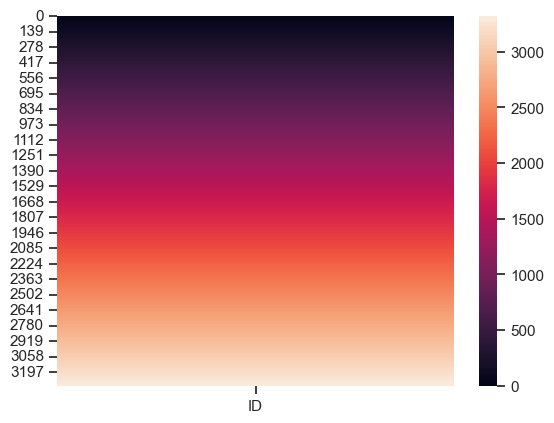

In [157]:
import seaborn as sn
# plotting the heatmap

hm = sn.heatmap(data = hm_data_id)
  
# displaying the plotted heatmap
plt.show()

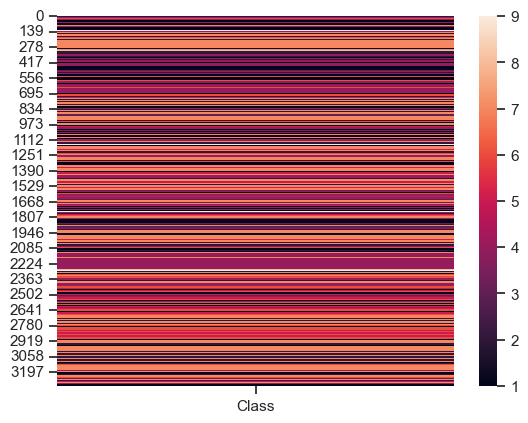

In [160]:
# plotting the heatmap

hm = sn.heatmap(data = hm_data_class)
  
# displaying the plotted heatmap
plt.show()

In [296]:
!pip install -q kmodes

In [297]:
from kmodes.kmodes import KModes

model = KModes(init='Huang', n_clusters=4, verbose=3)

clusters = model.fit(fin_clus_dataset)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 101, cost: 7986.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 361, cost: 7438.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 76, cost: 8162.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 648, cost: 7183.0
Run 4, iteration: 2/100, moves: 8, cost: 7183.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 467, cost: 6827.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 161, cost: 7754.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 139, cost: 7010.0
Init: initializing centroids
Init: initiali

In [298]:
print(model.cluster_centroids_)

[['BRCA2' 'Truncating Mutations' '1']
 ['PTEN' 'Deletion' '4']
 ['EGFR' 'Amplification' '7']
 ['BRCA1' 'S308A' '5']]


In [304]:
#plot(fin_clus_dataset, col=clus\$cluster)